# Data Collection from CSV

### Import Libraries

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

### Display Settings

In [154]:
pd.set_option('display.max_rows',20)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width',2000)

### Load Datasets

In [155]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3081,6376-GAHQE,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,77.85,299.2,Yes
2923,4402-FTBXC,Male,0,No,No,54,Yes,No,Fiber optic,Yes,No,Yes,No,Yes,No,Month-to-month,No,Mailed check,89.80,4667,No
5699,6719-OXYBR,Male,0,No,No,15,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,No,Electronic check,85.30,1219.85,No


In [156]:
df.shape

(7043, 21)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [158]:
df = df.drop(['customerID'], axis=1, errors='ignore', inplace=False)

In [159]:
df.sample()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5449,Male,0,Yes,Yes,67,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),103.15,6895.5,No


In [160]:
for column in df.columns:
     unique_values = df[column].unique()
     print(f"Column: {column}")
     print(unique_values)
     print("."*100)

Column: gender
['Female' 'Male']
....................................................................................................
Column: SeniorCitizen
[0 1]
....................................................................................................
Column: Partner
['Yes' 'No']
....................................................................................................
Column: Dependents
['No' 'Yes']
....................................................................................................
Column: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
....................................................................................................
Column: PhoneService
['No' 'Yes']
....................................................................................................

In [161]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

# Data Cleaning

In [162]:
df.columns = [
    ''.join(['_' + c.lower() if c.isupper() else c for c in col]).lstrip('_') 
    for col in df.columns
]
df.rename(columns={
     'streaming_t_v' :'streaming_tv'
}, inplace=True)
df.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges', 'churn'], dtype='object')

In [163]:
df.info(show_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Dtype  
---  ------             -----  
 0   gender             object 
 1   senior_citizen     int64  
 2   partner            object 
 3   dependents         object 
 4   tenure             int64  
 5   phone_service      object 
 6   multiple_lines     object 
 7   internet_service   object 
 8   online_security    object 
 9   online_backup      object 
 10  device_protection  object 
 11  tech_support       object 
 12  streaming_tv       object 
 13  streaming_movies   object 
 14  contract           object 
 15  paperless_billing  object 
 16  payment_method     object 
 17  monthly_charges    float64
 18  total_charges      object 
 19  churn              object 
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [164]:
df.isnull().sum()

gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
dtype: int64

In [165]:
df['total_charges'] = df['total_charges'].replace(' ', np.nan).astype(float)

In [166]:
missing_value = [value for value in df.columns if df[value].isna().sum() > 1]
for value in missing_value:
     print(f'{value}, {round(df[value].isna().mean(), 4)} % Missing values.')

total_charges, 0.0016 % Missing values.


In [167]:
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')
df['total_charges'].fillna(0, inplace=True)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   object 
 1   senior_citizen     7043 non-null   int64  
 2   partner            7043 non-null   object 
 3   dependents         7043 non-null   object 
 4   tenure             7043 non-null   int64  
 5   phone_service      7043 non-null   object 
 6   multiple_lines     7043 non-null   object 
 7   internet_service   7043 non-null   object 
 8   online_security    7043 non-null   object 
 9   online_backup      7043 non-null   object 
 10  device_protection  7043 non-null   object 
 11  tech_support       7043 non-null   object 
 12  streaming_tv       7043 non-null   object 
 13  streaming_movies   7043 non-null   object 
 14  contract           7043 non-null   object 
 15  paperless_billing  7043 non-null   object 
 16  payment_method     7043 

In [169]:
df['churn'].value_counts()

churn
No     5174
Yes    1869
Name: count, dtype: int64

In [170]:
# Calculate the overall churn rate
overall_churn_rate = df['churn'].value_counts(normalize=True)['Yes'] * 100
print(f"Overall Churn Rate: {overall_churn_rate:.2f}%")

Overall Churn Rate: 26.54%


## Findings :
     - Customer ID is not required for data modelling.
     - No missing values in the dataset except 'Total Charges'.
     - Class imbalanced was identified for target variables.

# Exploratory Data Analysis

In [171]:
df.shape

(7043, 20)

In [172]:
df.sample()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
1986,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),93.3,6398.05,No


In [173]:
df.describe(include='all', percentiles=[0.2, 0.4, 0.6, 0.8])

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2279.734304,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.794470,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,0.000000,NaN
20%,NaN,0.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.050000,265.320000,NaN
40%,NaN,0.000000,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.830000,939.780000,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1394.550000,NaN


### Numerical Features analysis

In [174]:
df['average_monthly_spend'] = df['total_charges'] / df['tenure']
df['average_monthly_spend'].fillna({'tenure' : 0}, inplace=True)

In [175]:
numerical_columns = [var for var in df.columns if df[var].dtype !='O']

print(numerical_columns)

['senior_citizen', 'tenure', 'monthly_charges', 'total_charges', 'average_monthly_spend']


In [176]:
def plot_distribution(data, columns):
    plt.figure(figsize=(5,4))
    sns.histplot(data[columns], kde=True)
    plt.title(f'Distribution of {columns}')
    col_mean = data[columns].mean()
    col_median = data[columns].median()
    col_std = data[columns].std()
    plt.axvline(col_mean, color='r', linestyle='--', label='Mean')
    plt.axvline(col_median, color='g', linestyle='--', label='Median')
    plt.axvline(col_mean + col_std, color='b', linestyle='--', label='Mean + 1SD')
    plt.axvline(col_mean - col_std, color='b', linestyle='--', label='Mean - 1SD')
    plt.axvline(col_mean + 2*col_std, color='y', linestyle='--', label='Mean + 2SD')
    plt.axvline(col_mean - 2*col_std, color='y', linestyle='--', label='Mean - 2SD')
    plt.legend()
    plt.show()

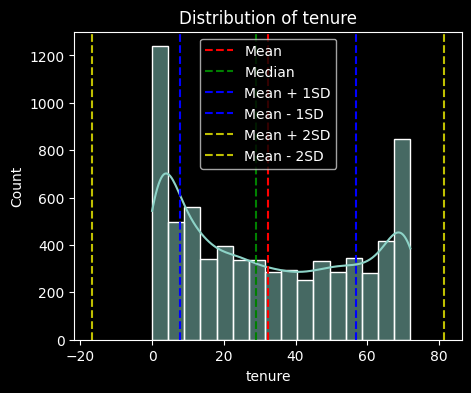

In [177]:
plot_distribution(df, 'tenure')

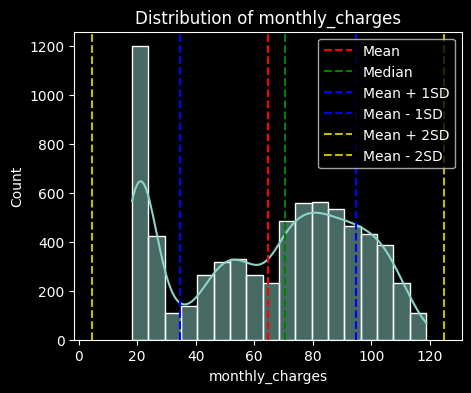

In [178]:
plot_distribution(df, 'monthly_charges')

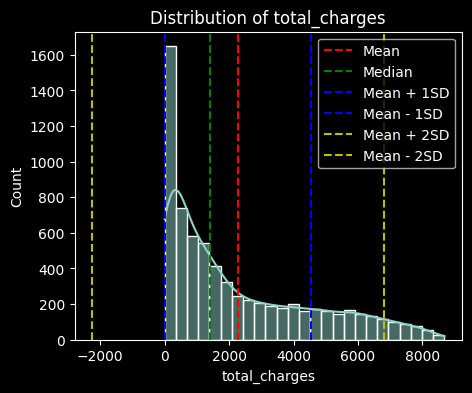

In [179]:
plot_distribution(df, 'total_charges')

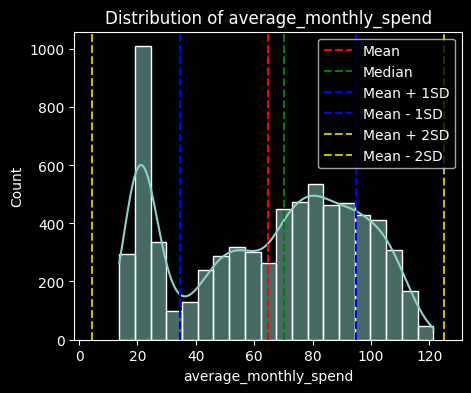

In [180]:
plot_distribution(df, 'average_monthly_spend')

In [181]:
def plot_boxplot(df, columns):
     plt.figure(figsize=(4,4))
     sns.boxenplot(y=df[columns])
     plt.title(f'Distribution of {columns}')
     plt.ylabel('columns')
     plt.show()

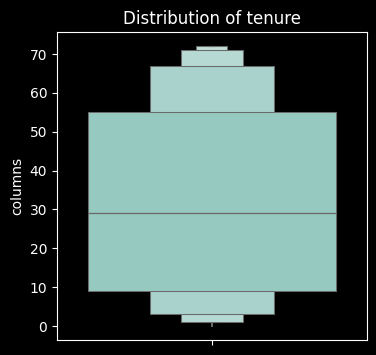

In [182]:
plot_boxplot(df, 'tenure')

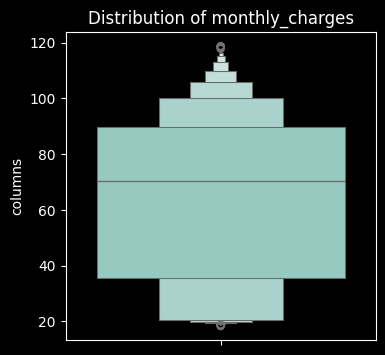

In [183]:
plot_boxplot(df, 'monthly_charges')

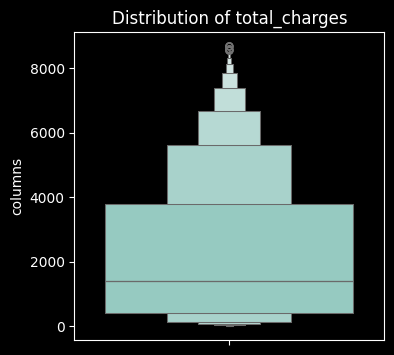

In [184]:
plot_boxplot(df, 'total_charges')

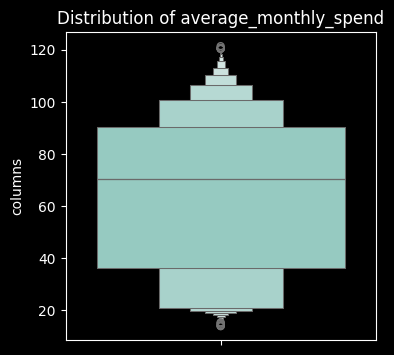

In [185]:
plot_boxplot(df, 'average_monthly_spend')

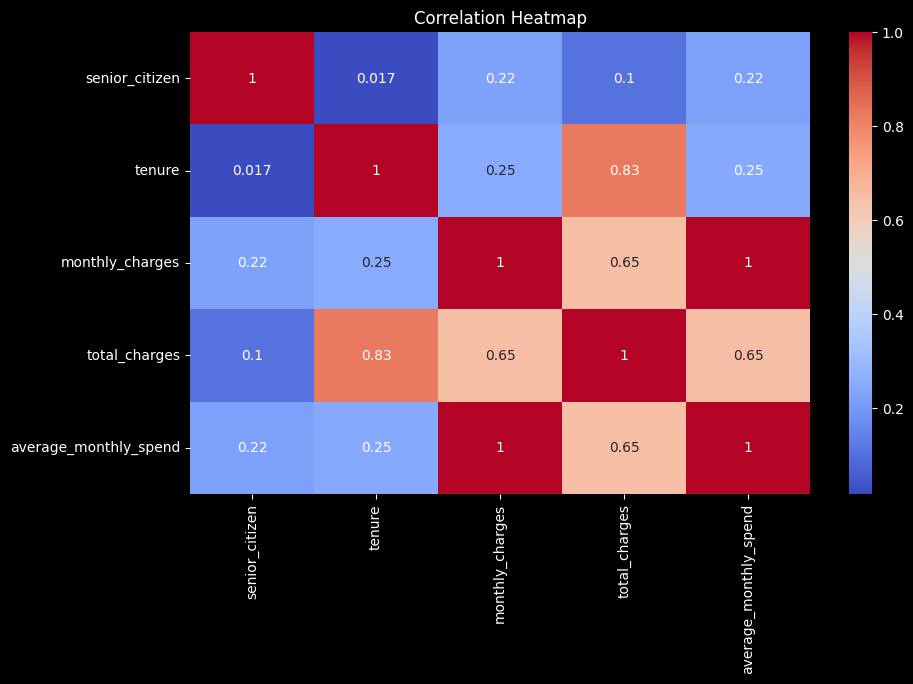

In [186]:
# Correlation matrix : Heatmap
plt.figure(figsize=(10,6))
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Categorical Features analysis

In [187]:
categorical_columns = [var for var in df.columns if df[var].dtype =='O']

print(categorical_columns)

['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'churn']


In [188]:
object_columns = ['senior_citizen'] + categorical_columns
print(object_columns)
for col in object_columns:
     print(f'{col} : {df[col].unique()}')

['senior_citizen', 'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'churn']
senior_citizen : [0 1]
gender : ['Female' 'Male']
partner : ['Yes' 'No']
dependents : ['No' 'Yes']
phone_service : ['No' 'Yes']
multiple_lines : ['No phone service' 'No' 'Yes']
internet_service : ['DSL' 'Fiber optic' 'No']
online_security : ['No' 'Yes' 'No internet service']
online_backup : ['Yes' 'No' 'No internet service']
device_protection : ['No' 'Yes' 'No internet service']
tech_support : ['No' 'Yes' 'No internet service']
streaming_tv : ['No' 'Yes' 'No internet service']
streaming_movies : ['No' 'Yes' 'No internet service']
contract : ['Month-to-month' 'One year' 'Two year']
paperless_billing : ['Yes' 'No']
payment_method : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automa

In [189]:
df['payment_method'] = df['payment_method'].str.replace(' (automatic)', '', regex=False)
df['payment_method'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

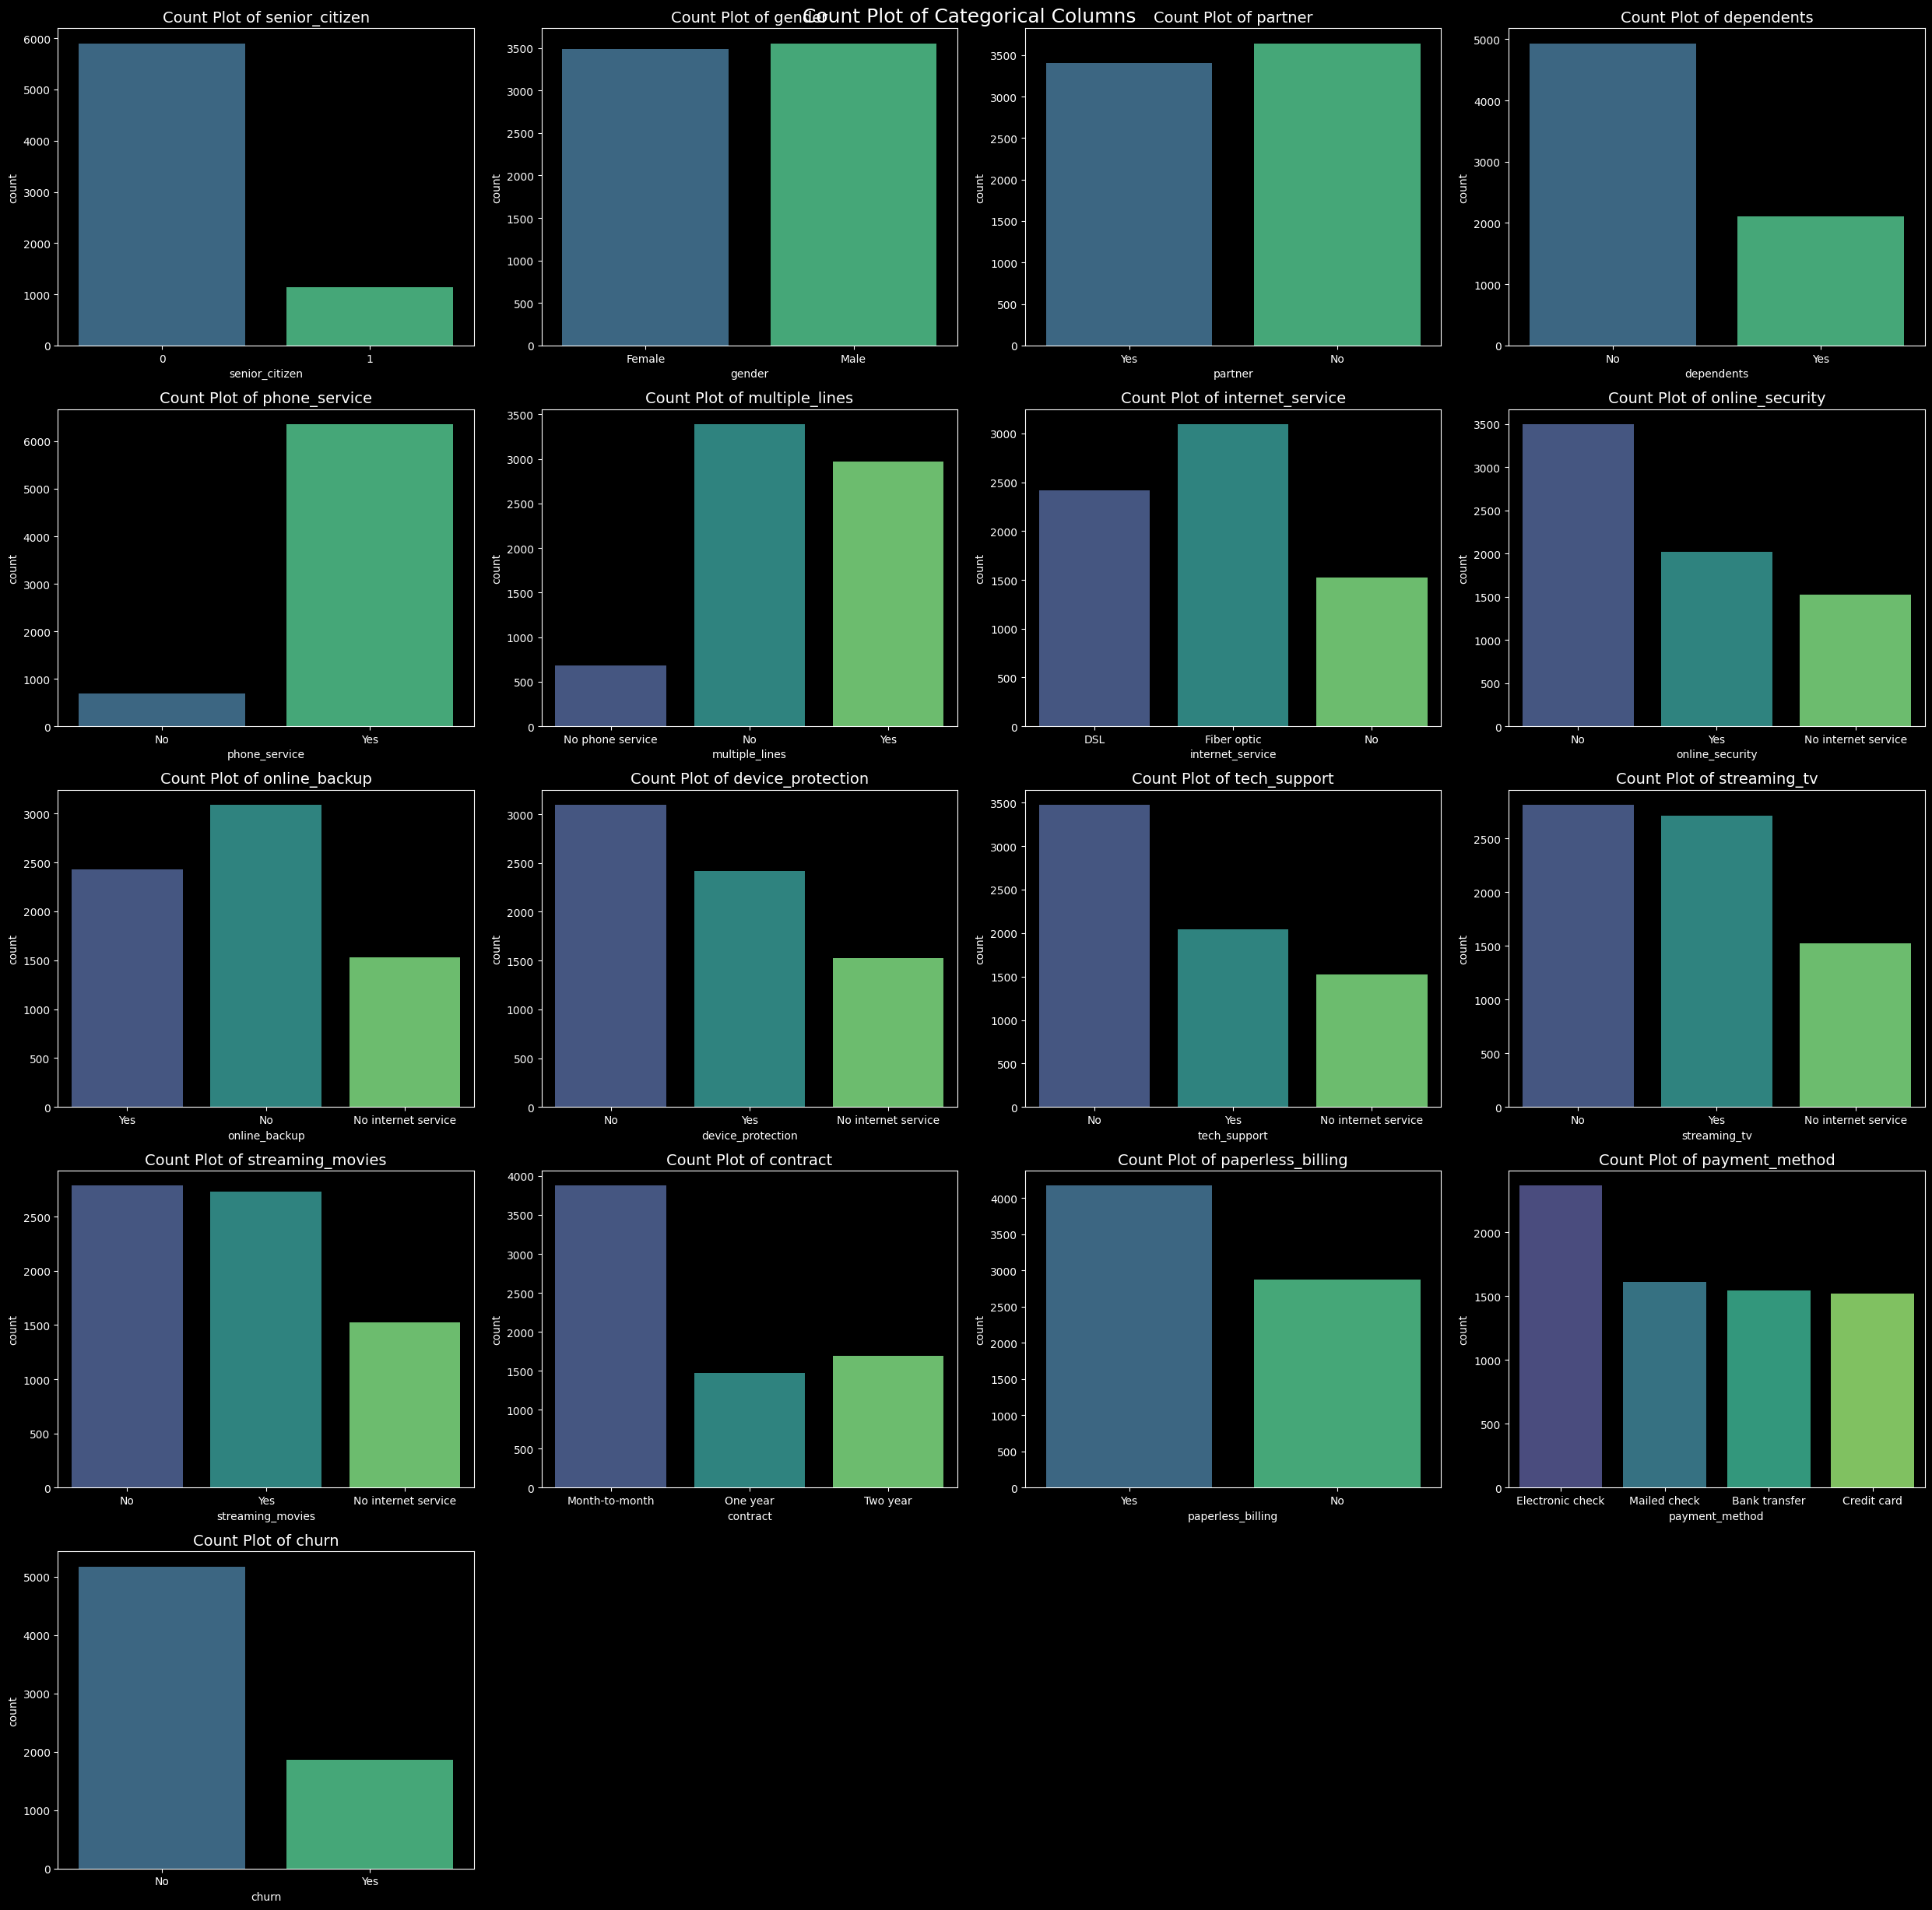

In [192]:
fig, axes = plt.subplots(5, 4, figsize=(25, 25))
fig.suptitle('Count Plot of Categorical Columns', fontsize=18)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, column in enumerate(object_columns):
     sns.countplot(x=column, data=df, ax=axes.flatten()[i], palette='viridis')
     axes.flatten()[i].set_title(f'Count Plot of {column}', fontsize=14)

# Hide any unused subplots
for j in range(len(object_columns), 20):
     fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

churn                                                                                              No        Yes
online_security online_backup device_protection tech_support streaming_tv streaming_movies                      
No              No            No                No           No           No                47.763348  52.236652
                                                                          Yes               35.135135  64.864865
                                                             Yes          No                38.596491  61.403509
                                                                          Yes               39.908257  60.091743
                                                Yes          No           No                73.529412  26.470588
...                                                                                               ...        ...
Yes             Yes           Yes               No           Yes          Yes               85.8

<Figure size 1400x800 with 0 Axes>

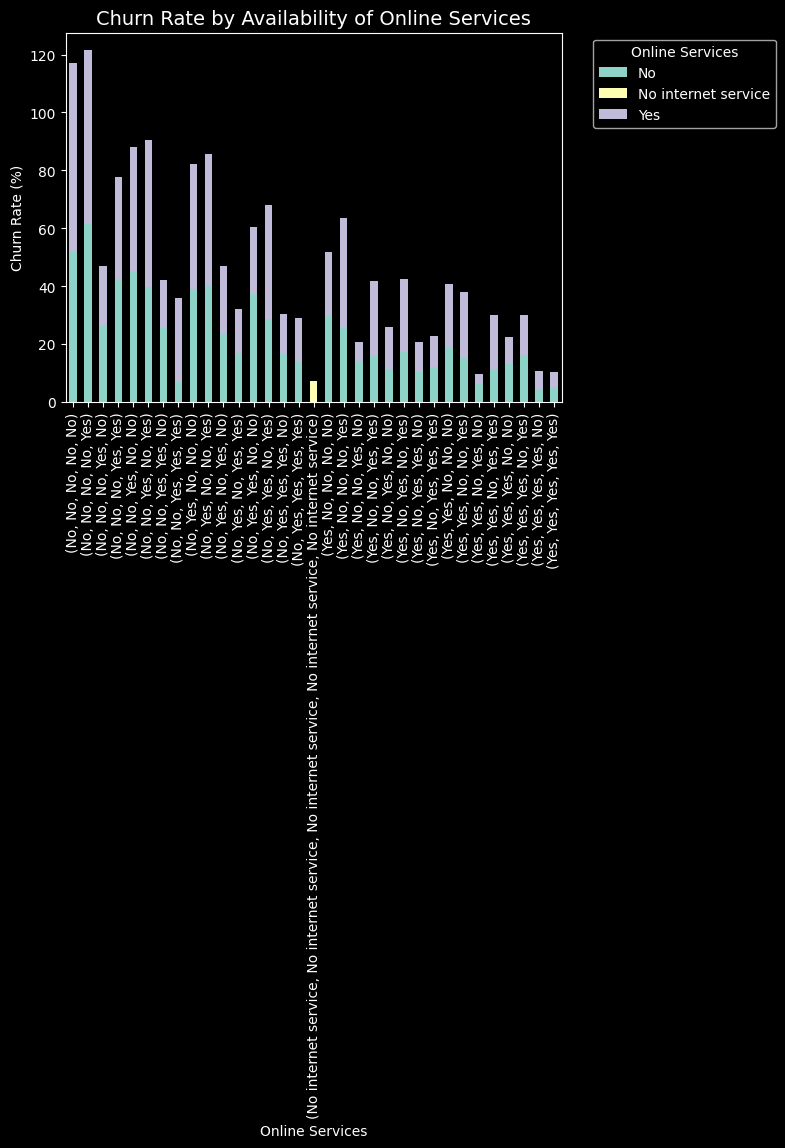

In [110]:
online_features = ['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']
churn_rate_by_features = df.groupby(online_features)['churn'].value_counts(normalize=True).unstack().fillna(0) * 100
print(churn_rate_by_features)

plt.figure(figsize=(14, 8))
churn_rate_by_features['Yes'].unstack().plot(kind='bar', stacked=True)
plt.title('Churn Rate by Availability of Online Services', fontsize=14)
plt.xlabel('Online Services')
plt.ylabel('Churn Rate (%)')
plt.legend(title='Online Services', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

                       mean    min      max          std
contract                                                
Month-to-month  1369.254581  18.85  8061.50  1613.879008
One year        3032.622878   0.00  8684.80  2230.374581
Two year        3706.934336   0.00  8672.45  2579.517834


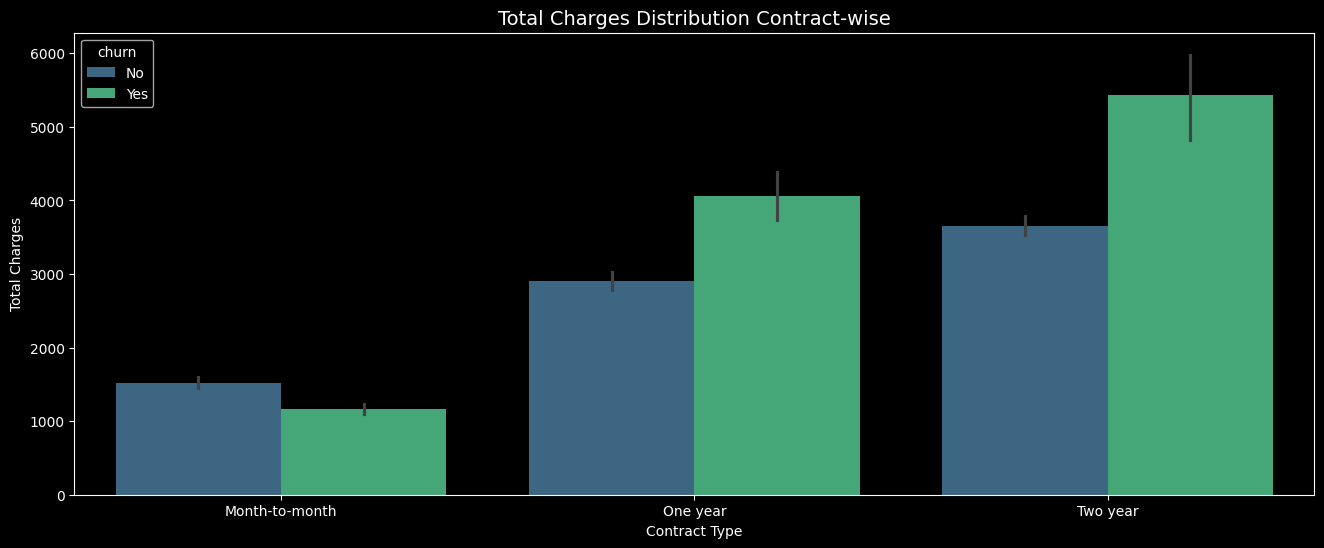

In [111]:
churn_stats_by_contract = df.groupby('contract')['total_charges'].agg(['mean', 'min', 'max', 'std'])
print(churn_stats_by_contract)

# Plot average monthly spend by contract type
plt.figure(figsize=(16, 6))
sns.barplot(x='contract', y='total_charges', data=df, hue='churn', palette='viridis')
plt.title('Total Charges Distribution Contract-wise', fontsize=14)
plt.xlabel('Contract Type')
plt.ylabel('Total Charges')
plt.show()

                         mean   min      max          std
internet_service                                         
DSL               2115.411338   0.0  6859.05  1880.690696
Fiber optic       3205.304570  68.5  8684.80  2570.220105
No                 662.604784   0.0  2006.95   555.627705


Text(0.5, 1.0, 'Total Charge Distribution Internet-Service-wise')

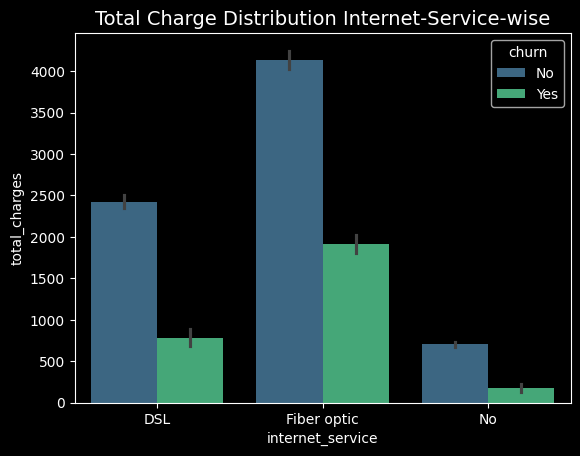

In [112]:
# Statistical calculations for total charges by internet service type
churn_stats_by_internet_service = df.groupby('internet_service')['total_charges'].agg(['mean', 'min', 'max', 'std'])
print(churn_stats_by_internet_service)

# Plot total charges by internet service type
sns.barplot(x='internet_service', y='total_charges', data=df, palette='viridis', hue='churn')
plt.title('Total Charge Distribution Internet-Service-wise', fontsize=14)

            mean    min     max        std
churn                                     
No     61.265124  18.25  118.75  31.092648
Yes    74.441332  18.85  118.35  24.666053


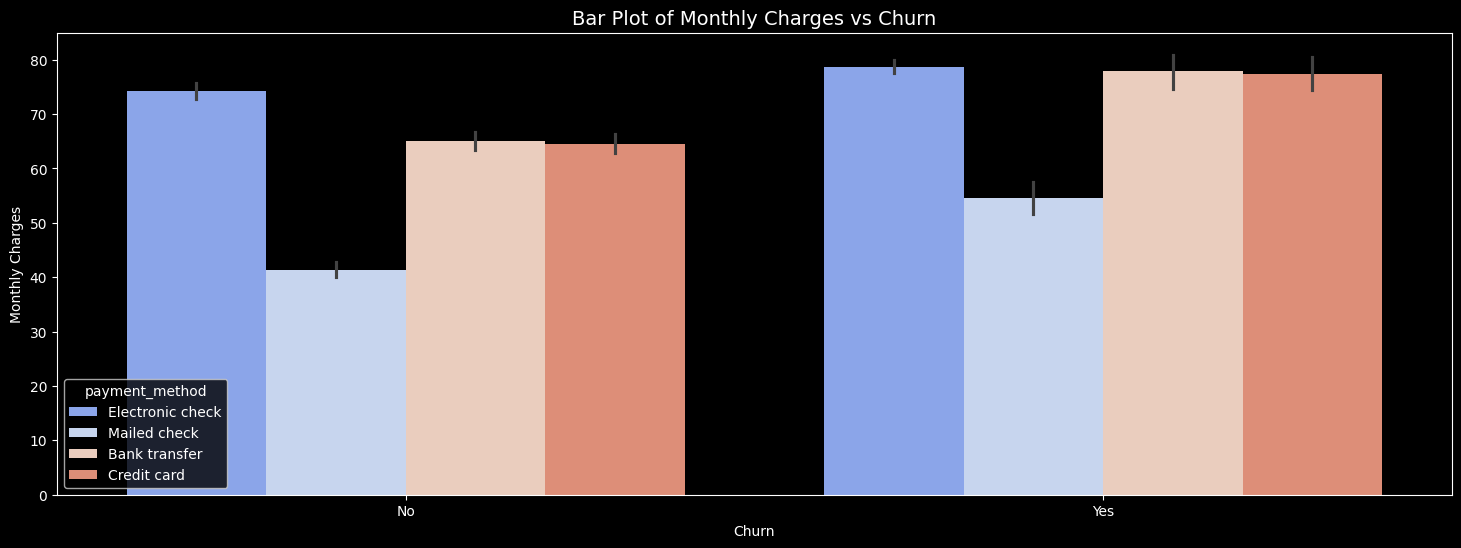

In [113]:
# Statistical calculations for churn by internet service type
churn_stats_by_internet_service = df.groupby('churn')['monthly_charges'].agg(['mean', 'min', 'max', 'std'])
print(churn_stats_by_internet_service)

plt.figure(figsize=(18, 6))
sns.barplot(x='churn', y='monthly_charges', data=df, hue='payment_method', palette='coolwarm')
plt.title('Bar Plot of Monthly Charges vs Churn', fontsize=14)
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

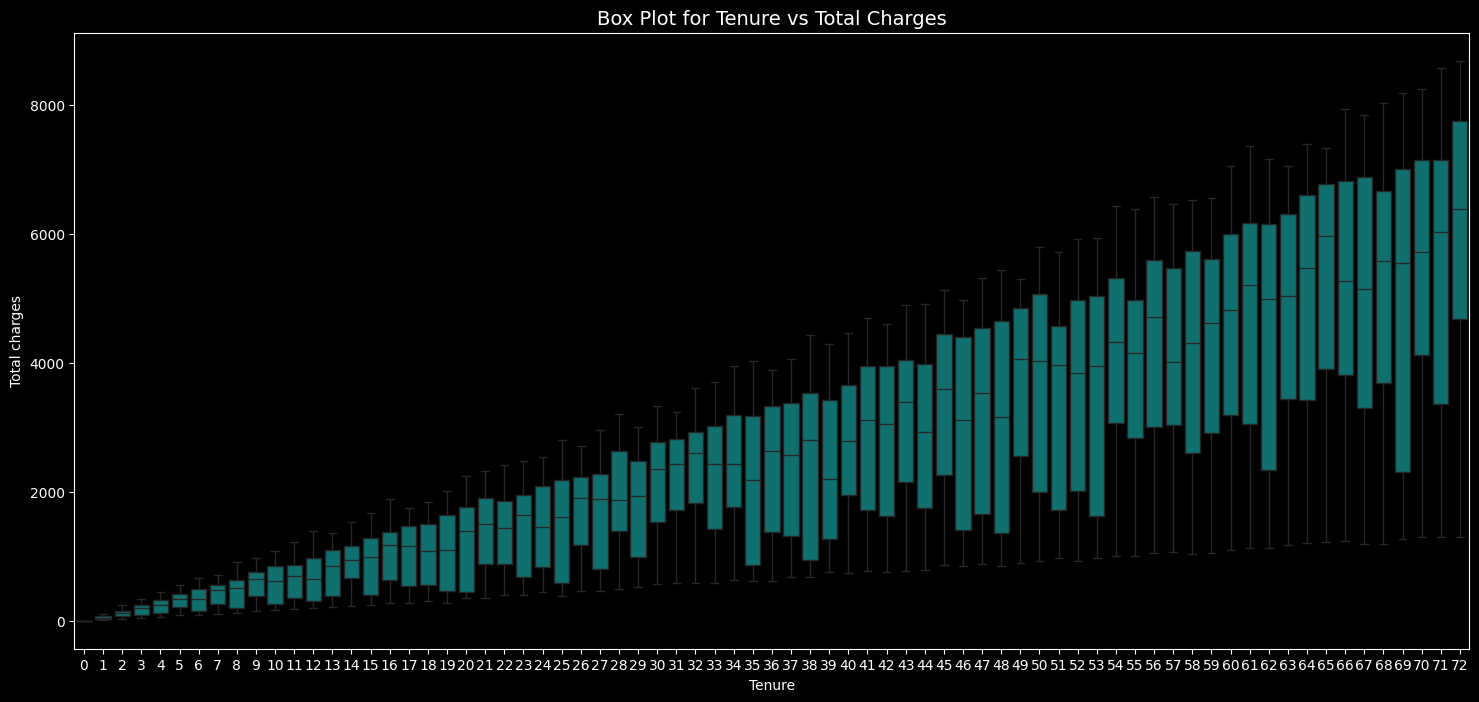

In [114]:
plt.figure(figsize=(18, 8))
sns.boxplot(x='tenure', y='total_charges', data=df, color='#008080')
plt.title('Box Plot for Tenure vs Total Charges', fontsize=14)
plt.xlabel('Tenure')
plt.ylabel('Total charges')
plt.show()

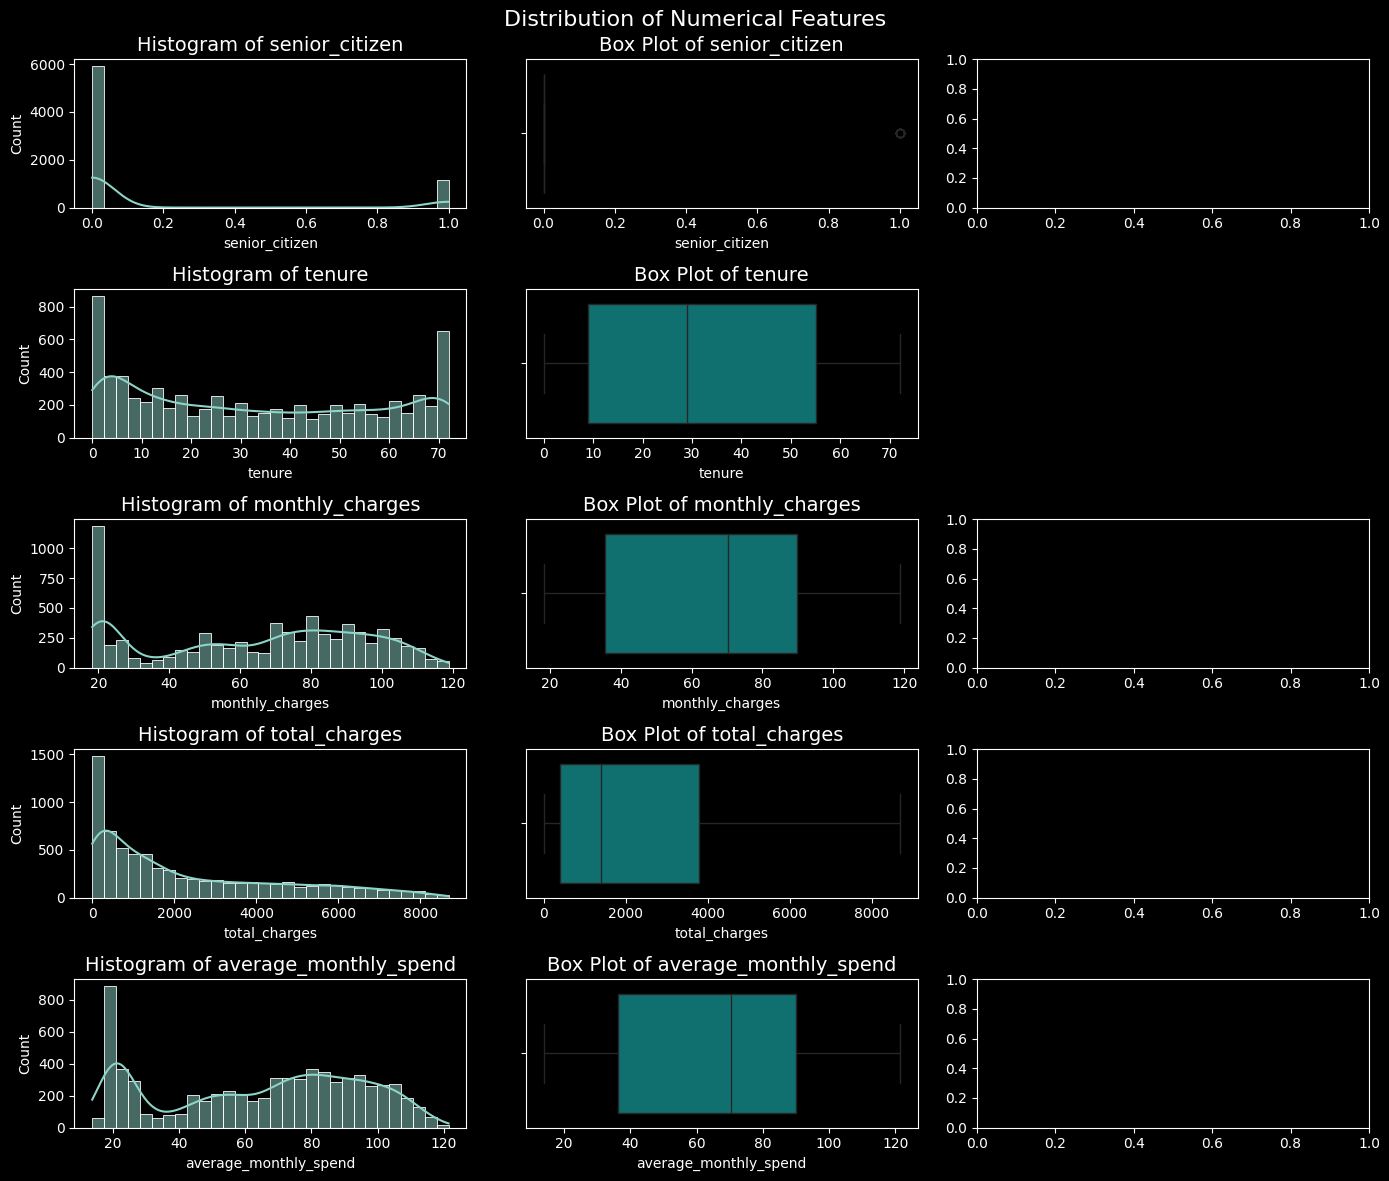

In [194]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(14, 12))
fig.suptitle('Distribution of Numerical Features', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {column}', fontsize=14)
    sns.boxplot(x=df[column], ax=axes[i, 1], color='#008080')
    axes[i, 1].set_title(f'Box Plot of {column}', fontsize=14)

# Hide the unused subplots
for j in range(len(numerical_columns), 3 * 2):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

churn                                     Churn Rate (%)
gender senior_citizen partner dependents                
Female 0              No      No               32.062780
                              Yes              22.535211
                      Yes     No               19.127517
                              Yes              14.691943
       1              No      No               49.842271
                              Yes              33.333333
                      Yes     No               34.928230
                              Yes              20.512821
Male   0              No      No               30.267922
                              Yes              20.379147
                      Yes     No               22.574956
                              Yes              12.773723
       1              No      No               48.360656
                              Yes              20.000000
                      Yes     No               37.366548
                              Y

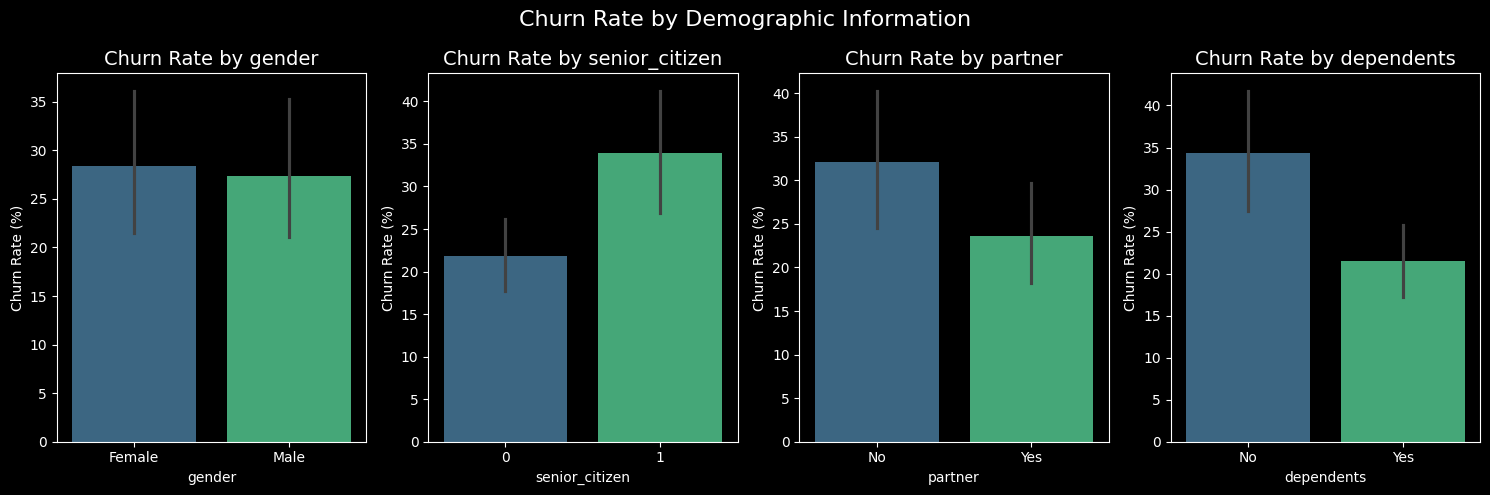

In [141]:
# Calculate churn rate by demographic information
demographic_columns = ['gender', 'senior_citizen', 'partner', 'dependents']
churn_rate_by_demographics = df.groupby(demographic_columns)['churn'].value_counts(normalize=True).unstack().fillna(0) * 100

# Display the churn rate
churn_rate_by_demographics['Churn Rate (%)'] = churn_rate_by_demographics['Yes']
churn_rate_by_demographics.drop(columns=['No', 'Yes'], inplace=True)
print(churn_rate_by_demographics)

# Plot the churn rate by demographic information
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle('Churn Rate by Demographic Information', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, column in enumerate(demographic_columns):
    sns.barplot(x=column, y='Churn Rate (%)', data=churn_rate_by_demographics, ax=axes.flatten()[i], palette='viridis')
    axes.flatten()[i].set_title(f'Churn Rate by {column}', fontsize=14)

plt.tight_layout()
plt.show()

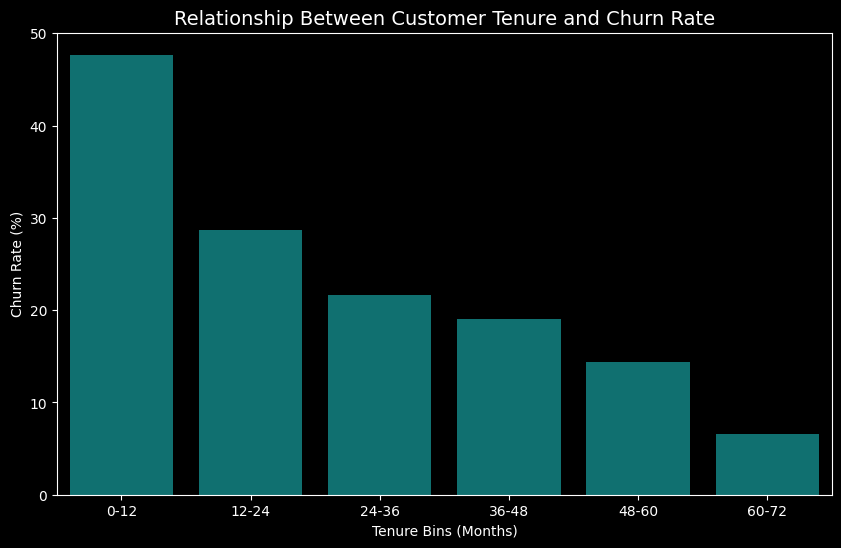

In [195]:
# Create a new column to categorize tenure into bins
df['tenure_bins'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '12-24', '24-36', '36-48', '48-60', '60-72'])

# Calculate churn rate by tenure bins
churn_rate_by_tenure = df.groupby('tenure_bins')['churn'].value_counts(normalize=True).unstack().fillna(0) * 100

churn_rate_by_tenure['Churn Rate (%)'] = churn_rate_by_tenure['Yes']
churn_rate_by_tenure.drop(columns=['No', 'Yes'], inplace=True)

# Plot churn rate by tenure bins
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_tenure.index, y=churn_rate_by_tenure['Churn Rate (%)'], color='teal')
plt.title('Relationship Between Customer Tenure and Churn Rate', fontsize=14)
plt.xlabel('Tenure Bins (Months)')
plt.ylabel('Churn Rate (%)')
plt.show()

# Data Preprocessing

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# dfle = df

In [41]:
# Label encoding for binary categorical variables
for col in categorical_columns:
     if df[col].nunique() == 2:
          print(f'{col} : {df[col].unique()}')
          df[col] = le.fit_transform(df[col])
          print(f'{col} : {df[col].unique()}')
          print('.'*100)

gender : ['Female' 'Male']
gender : [0 1]
....................................................................................................
partner : ['Yes' 'No']
partner : [1 0]
....................................................................................................
dependents : ['No' 'Yes']
dependents : [0 1]
....................................................................................................
phone_service : ['No' 'Yes']
phone_service : [0 1]
....................................................................................................
paperless_billing : ['Yes' 'No']
paperless_billing : [1 0]
....................................................................................................
churn : ['No' 'Yes']
churn : [0 1]
....................................................................................................


In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [43]:
# One hot encoding for multi-categorical variables
ohe = ColumnTransformer(
     transformers=[
          ('onehot', OneHotEncoder(drop='first'), [col for col in categorical_columns if df[col].nunique() > 2])
     ],
     remainder='passthrough'
)

df_encoded = ohe.fit_transform(df)
df_encoded = pd.DataFrame(df_encoded, columns=ohe.get_feature_names_out())
df_encoded.sample()

,onehot__multiple_lines_No phone service,onehot__multiple_lines_Yes,onehot__internet_service_Fiber optic,onehot__internet_service_No,onehot__online_security_No internet service,onehot__online_security_Yes,onehot__online_backup_No internet service,onehot__online_backup_Yes,onehot__device_protection_No internet service,onehot__device_protection_Yes,onehot__tech_support_No internet service,onehot__tech_support_Yes,onehot__streaming_tv_No internet service,onehot__streaming_tv_Yes,onehot__streaming_movies_No internet service,onehot__streaming_movies_Yes,onehot__contract_One year,onehot__contract_Two year,onehot__payment_method_Credit card,onehot__payment_method_Electronic check,onehot__payment_method_Mailed check,remainder__gender,remainder__senior_citizen,remainder__partner,remainder__dependents,remainder__tenure,remainder__phone_service,remainder__paperless_billing,remainder__monthly_charges,remainder__total_charges,remainder__churn,remainder__average_monthly_spend
1483,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,51.0,1.0,1.0,69.75,3562.5,0.0,69.852941


In [107]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
df_encoded = pd.DataFrame(df_encoded, columns=ohe.get_feature_names_out())
X = df_encoded.drop(columns=['remainder__churn'], axis=1)
y = df_encoded.loc[:, 'remainder__churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (5634, 31)
X_test shape: (1409, 31)
y_train shape: (5634,)
y_test shape: (1409,)


In [108]:
y_train.value_counts()

remainder__churn
0.0    4138
1.0    1496
Name: count, dtype: int64

In [109]:
X_train.sample()

,onehot__multiple_lines_No phone service,onehot__multiple_lines_Yes,onehot__internet_service_Fiber optic,onehot__internet_service_No,onehot__online_security_No internet service,onehot__online_security_Yes,onehot__online_backup_No internet service,onehot__online_backup_Yes,onehot__device_protection_No internet service,onehot__device_protection_Yes,onehot__tech_support_No internet service,onehot__tech_support_Yes,onehot__streaming_tv_No internet service,onehot__streaming_tv_Yes,onehot__streaming_movies_No internet service,onehot__streaming_movies_Yes,onehot__contract_One year,onehot__contract_Two year,onehot__payment_method_Credit card,onehot__payment_method_Electronic check,onehot__payment_method_Mailed check,remainder__gender,remainder__senior_citizen,remainder__partner,remainder__dependents,remainder__tenure,remainder__phone_service,remainder__paperless_billing,remainder__monthly_charges,remainder__total_charges,remainder__average_monthly_spend
2060,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,71.0,1.0,0.0,90.35,6325.25,89.088028


In [110]:
# Handling missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

In [111]:
# Handling imbalanced data using SMOTE
from imblearn.over_sampling import SMOTE

# Ensure there are no missing values in X_train_imputed
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns).fillna(0)

smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_imputed, y_train) # type: ignore

In [112]:
y_train_smote.value_counts()

remainder__churn
0.0    4138
1.0    4138
Name: count, dtype: int64

# Model Training & Evaluation

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

parameters = {
     'objective' : 'binary:logistic',
     'max_depth' : 4,
     'learning_rate' : 0.3,
     'n_estimators' : 100,
     'random_state' : 42,
     'alpha' : 10
}

xgb_clf = XGBClassifier(**parameters)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

models = {
     'Logistic Regression' : LogisticRegression(random_state=42),
     'Random Forest Classifier' : RandomForestClassifier(random_state=42),
     'Gradient Boosting' : GradientBoostingClassifier(random_state=42),
     'XGBoost' : XGBClassifier(**parameters)
}

In [114]:
import xgboost as xgb
from xgboost import cv

parameters = {
     'objective' : 'binary:logistic',
     'colsample_bytree' : 0.3,
     'learning_rate' : 0.3,
     'max_depth' : 4,
     'alpha' : 10,
     'random_state' : 42
}
xgb_cv = cv(dtrain=xgb.DMatrix(X_train, label=y_train), params=parameters, nfold=3, num_boost_round=50, early_stopping_rounds=10, metrics='error', as_pandas=True, seed=42)

In [115]:
xgb_cv

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.265531,0.002263,0.265531,0.004525
1,0.265531,0.002263,0.265531,0.004525
2,0.229411,0.006335,0.235357,0.008695
3,0.214767,0.004674,0.222755,0.006365
4,0.209709,0.002761,0.217962,0.002145
...,...,...,...,...
22,0.187700,0.004914,0.203230,0.011079
23,0.187700,0.004807,0.203408,0.010623
24,0.186546,0.004689,0.202165,0.010688
25,0.186013,0.004467,0.202343,0.011304


In [117]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer

# Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

def evaluate_model(model, X_test, y_test):
     y_pred = model.predict(X_test)
     accuracy = accuracy_score(y_test, y_pred)
     roc_auc = roc_auc_score(y_test, y_pred)
     confusion = confusion_matrix(y_test, y_pred)
     classification = classification_report(y_test, y_pred)
     return accuracy, roc_auc, confusion, classification

for model_name, model in models.items():
     model.fit(X_train_imputed, y_train)
     accuracy, roc_auc, confusion, classification = evaluate_model(model, X_test_imputed, y_test)
     print(f'Model: {model_name}')
     print('_'*40)
     print(f'Accuracy: {accuracy}')
     print(f'ROC AUC: {roc_auc}')
     print(f'Confusion Matrix: \n{confusion}')
     print(f'Classification Report: \n{classification}')
     print('='*100)

e:\VSCode_2023\Programming\DataAnalysis\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
________________________________________
Accuracy: 0.8225691980127751
ROC AUC: 0.742944351858561
Confusion Matrix: 
[[945  91]
 [159 214]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88      1036
         1.0       0.70      0.57      0.63       373

    accuracy                           0.82      1409
   macro avg       0.78      0.74      0.76      1409
weighted avg       0.82      0.82      0.82      1409

Model: Random Forest Classifier
________________________________________
Accuracy: 0.794180269694819
ROC AUC: 0.6918986201828025
Confusion Matrix: 
[[942  94]
 [196 177]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1036
         1.0       0.65      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg    

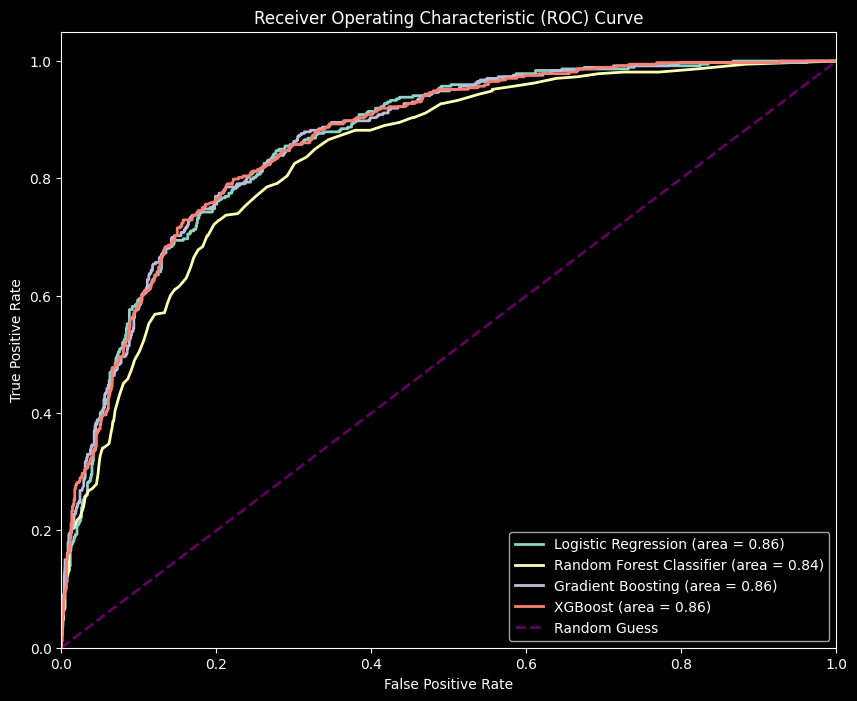

In [118]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve
def plot_roc_curve(models, X_test, y_test):
     plt.figure(figsize=(10, 8))
     for model_name, model in models.items():
          y_pred_proba = model.predict_proba(X_test)[:, 1]
          fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
          roc_auc = auc(fpr, tpr)
          plt.plot(fpr, tpr, lw=2, label=f'{model_name} (area = {roc_auc:.2f})')
     
     plt.plot([0, 1], [0, 1], color='m', lw=2, linestyle='--', label='Random Guess', alpha=0.5)
     plt.xlim([0.0, 1.0])
     plt.ylim([0.0, 1.05])
     plt.xlabel('False Positive Rate')
     plt.ylabel('True Positive Rate')
     plt.title('Receiver Operating Characteristic (ROC) Curve')
     plt.legend(loc='lower right')
     plt.show()

# Impute missing values in X_test
X_test_imputed = imputer.transform(X_test)

# Plot ROC curves for all models
plot_roc_curve(models, X_test_imputed, y_test)

# Save the trained model as a pickle file

In [119]:
import joblib

joblib.dump(xgb_clf, 'customer_churn_xgbclf.pkl')

['customer_churn_xgbclf.pkl']

In [120]:
with open('customer_churn_xgbclf.pkl', 'rb') as f:
     model = joblib.load(f)

# Churn Prediction System

In [121]:
df.sample()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,average_monthly_spend
4447,1,0,1,0,68,1,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Month-to-month,1,Electronic check,107.7,7320.9,0,107.660294


In [122]:
import joblib

# Load the trained model
loaded_model = joblib.load('customer_churn_xgbclf.pkl')

# Define feature names
feature_names = X_train.columns.tolist()

def predict_churn(input_data):
     # Ensure the input data is in the correct format
     input_df = pd.DataFrame([input_data], columns=feature_names)
     
     # Impute missing values
     input_df_imputed = imputer.transform(input_df)
     
     # Make prediction using the loaded model
     prediction = loaded_model.predict(input_df_imputed)
     
     # Return the prediction result
     return prediction[0]

# Example input data
example_input = {
     'onehot__multiple_lines_No phone service': 0.0,
     'onehot__multiple_lines_Yes': 1.0,
     'onehot__internet_service_Fiber optic': 1.0,
     'onehot__internet_service_No': 0.0,
     'onehot__online_security_No internet service': 0.0,
     'onehot__online_security_Yes': 1.0,
     'onehot__online_backup_No internet service': 0.0,
     'onehot__online_backup_Yes': 1.0,
     'onehot__device_protection_No internet service': 0.0,
     'onehot__device_protection_Yes': 0.0,
     'onehot__tech_support_No internet service': 0.0,
     'onehot__tech_support_Yes': 1.0,
     'onehot__streaming_tv_No internet service': 0.0,
     'onehot__streaming_tv_Yes': 1.0,
     'onehot__streaming_movies_No internet service': 0.0,
     'onehot__streaming_movies_Yes': 1.0,
     'onehot__contract_One year': 0.0,
     'onehot__contract_Two year': 0.0,
     'onehot__payment_method_Credit card': 0.0,
     'onehot__payment_method_Electronic check': 1.0,
     'onehot__payment_method_Mailed check': 0.0,
     'remainder__gender': 0.0,
     'remainder__senior_citizen': 0.0,
     'remainder__partner': 1.0,
     'remainder__dependents': 0.0,
     'remainder__tenure': 68.0,
     'remainder__phone_service': 1.0,
     'remainder__paperless_billing': 1,
     'remainder__monthly_charges': 107.7,
     'remainder__total_charges': 7320.9,
     'remainder__average_monthly_spend': 107.660294
}

# Predict churn for the example input
prediction = predict_churn(example_input)
print(f'Churn Prediction: {prediction}')

Churn Prediction: 0


# Storytelling: Telecom Customer Churn Analysis

## Introduction
The goal of this analysis is to understand the factors contributing to customer churn in a telecommunications company and to build a predictive model to identify customers likely to churn.

## Data Collection
The dataset used for this analysis is the "WA_Fn-UseC_-Telco-Customer-Churn.csv" file, which contains various customer attributes.

## Data Cleaning
- Removed unnecessary columns like `customerID`.
- Handled missing values in the `total_charges` column by replacing them with the mean value.
- Renamed columns for consistency and readability.

## Exploratory Data Analysis (EDA)
### Numerical Features Analysis
- Created new feature `average_monthly_spend`.
- Plotted distributions and boxplots for numerical features like `tenure`, `monthly_charges`, `total_charges`, and `average_monthly_spend`.
- Generated a correlation heatmap to understand relationships between numerical features.

### Categorical Features Analysis
- Analyzed unique values and distributions of categorical features.
- Cleaned and encoded categorical features using Label Encoding and One-Hot Encoding.

## Data Preprocessing
- Split the data into training and testing sets.
- Handled missing values using SimpleImputer.
- Addressed class imbalance using SMOTE.

## Model Training
- Trained multiple models including Logistic Regression, Random Forest, Gradient Boosting, and XGBoost.
- Evaluated models using accuracy, ROC AUC, confusion matrix, and classification report.

## Findings
- The XGBoost model performed the best with an accuracy of 81.69% and a ROC AUC of 0.73.
- Key factors influencing churn include `contract type`, `monthly charges`, and `tenure`.

## Conclusion
The analysis successfully identified key factors contributing to customer churn and built a predictive model with good performance. The insights gained can help the company implement targeted retention strategies to reduce churn.